In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
matplotlib.style.use('seaborn-white')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (12,7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams["font.weight"] = "bold"
matplotlib.rc('axes', labelsize=14, titlesize=14)
matplotlib.rc('legend', fontsize=14)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
colors = ['#40128B','#DD58D6']

In [3]:
df=pd.read_csv("C:\\Users\\rawat\\Downloads\\car details v4.csv")

In [4]:
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [5]:
df.shape

(2059, 20)

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


# EDA

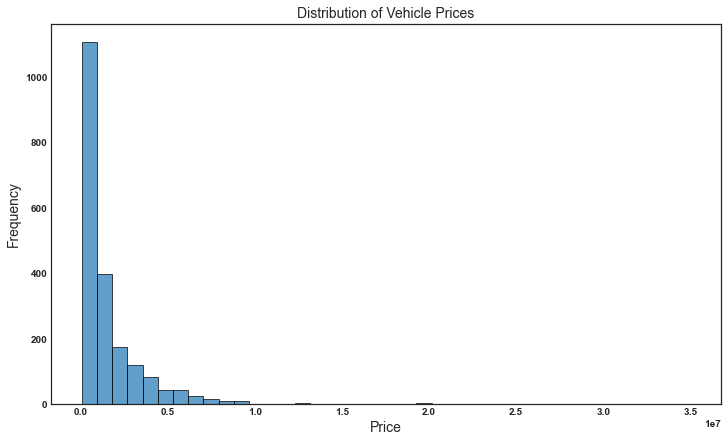

In [8]:
# Create a histogram
plt.hist(df['Price'], bins=40, edgecolor='black', alpha=0.7)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# How does the price of vehicles vary with their manufacturing year?

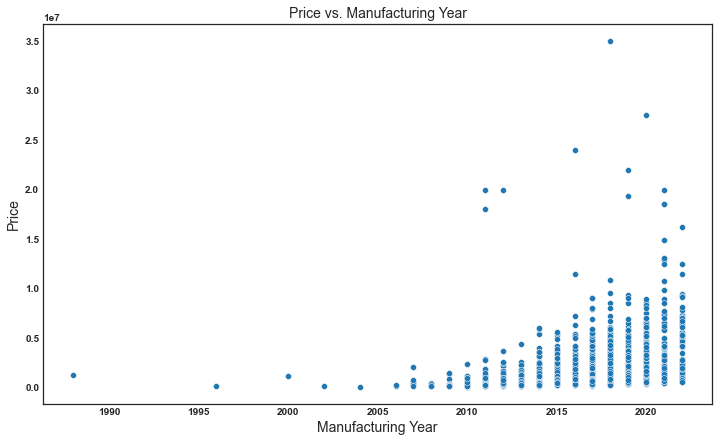

In [9]:
sns.scatterplot( x = 'Year' , y = 'Price' , data=df)
plt.title('Price vs. Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.show()

# What is the distribution of fuel types among the vehicles?

In [10]:
#Taking Top 3 Values & marking other as 'Others'

fuels_type = df['Fuel Type'].unique()
fuels_type_count = df['Fuel Type'].value_counts()
top_n = 3
top_fuel_types = list(fuels_type[:top_n])
top_count = list(fuels_type_count[:top_n])
print(top_fuel_types)
print(top_count)

['Petrol', 'Diesel', 'CNG']
[1049, 942, 50]


In [13]:
others_count = sum(fuels_type_count[top_n:])
top_fuel_types.append('Others')
top_count.append(others_count)

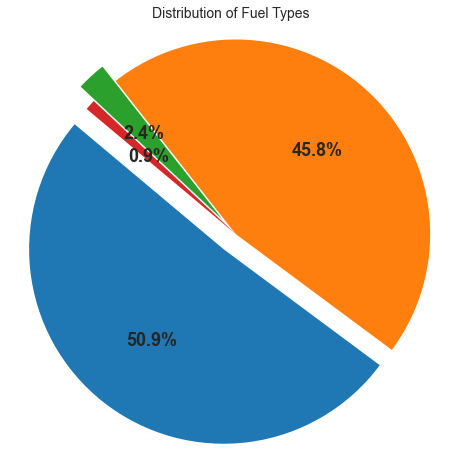

In [20]:
#Create a pie chart

explode = (0.1,0,0.1,0)
plt.figure(figsize=(8, 8))
plt.pie(top_count, autopct='%1.1f%%', startangle=140,explode=explode)
plt.title('Distribution of Fuel Types')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
# Show the pie chart
plt.show()

# How are vehicles distributed based on their transmission types?

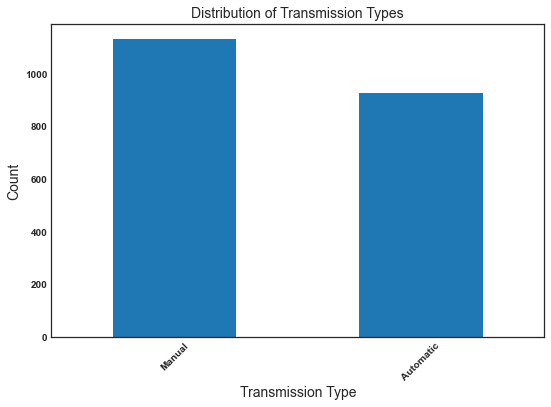

In [23]:
plt.figure(figsize=(8, 6))
transmission_count = df['Transmission'].value_counts()
transmission_count.plot(kind='bar');
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
# Show the bar chart
plt.tight_layout()
plt.show()

# Which top 10 locations have the most listings for vehicles?

In [24]:
#Top 10 locations
location = df['Location'].unique()
location_count = df['Location'].value_counts()
top_n = 10
top_location = list(location[:top_n])
top_location_count = list(location_count[:top_n])
print(top_location)
print(top_location_count)


['Pune', 'Ludhiana', 'Lucknow', 'Mangalore', 'Mumbai', 'Coimbatore', 'Bangalore', 'Delhi', 'Raipur', 'Kanpur']
[342, 307, 144, 132, 116, 78, 70, 63, 60, 52]


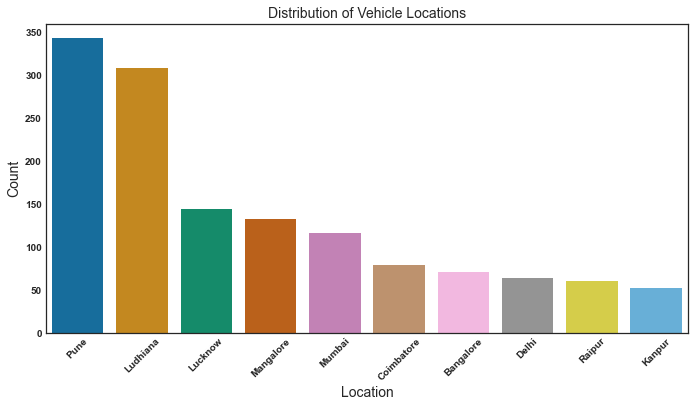

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_location, y=top_location_count, palette='colorblind')
plt.title('Distribution of Vehicle Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What types of sellers are most prevalent in the dataset?

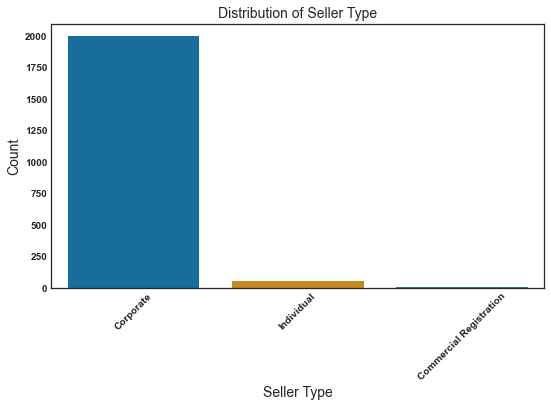

In [26]:
# Top 10 locations
seller = list(df['Seller Type'].unique())
seller_count = list(df['Seller Type'].value_counts())
plt.figure(figsize=(8, 6))
sns.barplot(x= seller, y=seller_count, palette='colorblind')
plt.title('Distribution of Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

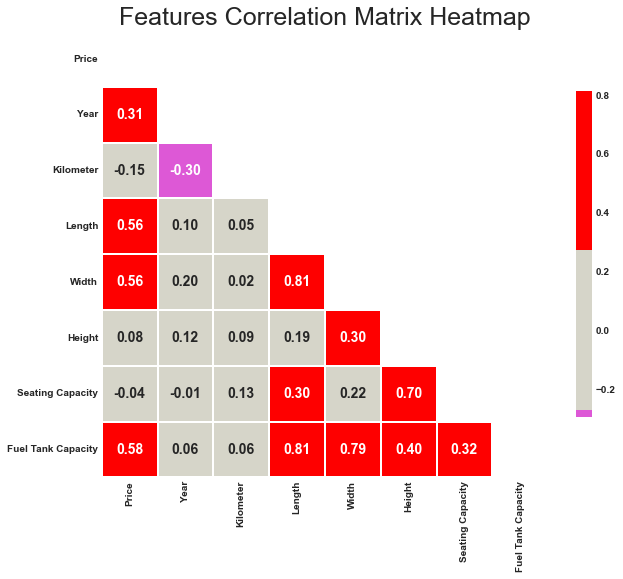

In [29]:
#Plot Matrix of Correlation
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})
heatmap_colors = [colors[1], '#d6d5c9', '#FE0000']
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), 
 mask=mask,
 center=0,
 annot=True,
 fmt='.2f',
 cmap=heatmap_colors,
 square=True,
 linewidths=.2,
 cbar_kws={"shrink": .6})
plt.title('Features Correlation Matrix Heatmap', fontsize=25);

# DATA PREPROCESSING

In [30]:
input_cols = ['Year', 'Kilometer', 'Fuel Type',
 'Transmission', 'Location','Engine', 'Length', 'Width', 
 'Seating Capacity', 'Fuel Tank Capacity']
target_col = 'Price'

In [31]:
new_df = df[input_cols]
new_df.head(3)

,Year,Kilometer,Fuel Type,Transmission,Location,Engine,Length,Width,Seating Capacity,Fuel Tank Capacity
0,2017,87150,Petrol,Manual,Pune,1198 cc,3990.0,1680.0,5.0,35.0
1,2014,75000,Diesel,Manual,Ludhiana,1248 cc,3995.0,1695.0,5.0,42.0
2,2011,67000,Petrol,Manual,Lucknow,1197 cc,3585.0,1595.0,5.0,35.0


In [32]:
new_df.isnull().sum()

Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Engine                 80
Length                 64
Width                  64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [33]:
new_df.shape

(2059, 10)

In [34]:
#identifying categorical and numerical columns
numeric_cols = new_df.select_dtypes( include = np.number ).columns.tolist()
categorical_cols = new_df.select_dtypes('object').columns.tolist()

In [35]:
print(numeric_cols)
print(categorical_cols)

['Year', 'Kilometer', 'Length', 'Width', 'Seating Capacity', 'Fuel Tank Capacity']
['Fuel Type', 'Transmission', 'Location', 'Engine']


# handling missing values

In [36]:
#numerical columns
imputer = SimpleImputer(strategy = 'median')

In [37]:
imputer.fit(new_df[numeric_cols])

SimpleImputer(strategy='median')

In [38]:
new_df[numeric_cols] = imputer.transform(new_df[numeric_cols])

In [39]:
new_df[numeric_cols].isnull().sum()

Year                  0
Kilometer             0
Length                0
Width                 0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [40]:
#categorical
imputer_category = SimpleImputer(strategy = 'most_frequent')

In [41]:
imputer_category.fit(new_df[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [42]:
new_df[categorical_cols] = imputer_category.transform(new_df[categorical_cols])

In [43]:
new_df[categorical_cols].isnull().sum()

Fuel Type       0
Transmission    0
Location        0
Engine          0
dtype: int64

In [44]:
new_df.isnull().sum()

Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Engine                0
Length                0
Width                 0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

# Encoding Categorical Columns

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform your categorical columns
encoded_data = encoder.fit_transform(new_df[categorical_cols])

# Get the feature names
encoded_cols = []

for col_name, cats in zip(categorical_cols, encoder.categories_):
    encoded_cols.extend([f'{col_name}_{cat}' for cat in cats])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

# Concatenate the encoded DataFrame with the original DataFrame
new_df = pd.concat([new_df, encoded_df], axis=1)

# Scaling The Data

In [68]:
scaler = MinMaxScaler()
scaler.fit(new_df[numeric_cols])
new_df[numeric_cols] = scaler.transform(new_df[numeric_cols])
new_df.head(3)

,Year,Kilometer,Fuel Type,Transmission,Location,Engine,Length,Width,Seating Capacity,Fuel Tank Capacity,...,Engine_624 cc,Engine_6592 cc,Engine_793 cc,Engine_796 cc,Engine_799 cc,Engine_814 cc,Engine_936 cc,Engine_995 cc,Engine_998 cc,Engine_999 cc
0,0.852941,0.043575,Petrol,Manual,Pune,1198 cc,0.360729,0.275168,0.5,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.764706,0.037500,Diesel,Manual,Ludhiana,1248 cc,0.362753,0.295302,0.5,0.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.676471,0.033500,Petrol,Manual,Lucknow,1197 cc,0.196761,0.161074,0.5,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
new_df_final = new_df[encoded_cols + numeric_cols]
new_df_final.head(3)

,Fuel Type_CNG,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_Automatic,...,Engine_936 cc,Engine_995 cc,Engine_998 cc,Engine_999 cc,Year,Kilometer,Length,Width,Seating Capacity,Fuel Tank Capacity
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.852941,0.043575,0.360729,0.275168,0.5,0.222222
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.764706,0.037500,0.362753,0.295302,0.5,0.300000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.676471,0.033500,0.196761,0.161074,0.5,0.222222


In [70]:
#train/test/split

In [71]:
x = new_df_final.values
y = df[target_col].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1647, 202)
(412, 202)
(1647,)
(412,)



# model training

In [73]:
#linear reg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 4.5148296982366785e+33
R-squared (R2) Score: -6.462421035958297e+20


In [74]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 1903160521264.5513
R-squared (R2) Score: 0.727586079443286


# pickle file

In [76]:
import pickle
with open("preprocessing.pkl", "wb") as file:
    pickle.dump(new_df_final, file)
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


In [77]:
with open("encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)
with open("encoded_cols.pkl", "wb") as file:
    pickle.dump(encoded_cols, file)

#prediction 

In [79]:
import pandas as pd
input_data = pd.DataFrame({
 'Year': [2020],
 'Kilometer': [5000],
 'Engine': ['1198 cc'],
 'Length': [4500],
 'Width': [1800],
 'Seating Capacity': [5],
 'Fuel Tank Capacity': [50],
 'Fuel Type': ['Petrol'], 
 'Transmission': ['Automatic'], 
 'Location': ['Pune'], 
})
input_encoded = encoder.transform(input_data[categorical_cols])
input_encoded_df = pd.DataFrame(input_encoded, columns=encoded_cols)
# Combine the numerical and encoded categorical features
input_features = pd.concat([input_data[numeric_cols], input_encoded_df], axis=1)

In [80]:
prediction = model.predict(input_features)
print(prediction)

[1458570.01]


# deployment

In [81]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [82]:
import pickle
with open('encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)
with open('model.pkl', 'rb') as file2:
    model = pickle.load(file2)
with open('encoded_cols.pkl', 'rb') as file3:
    encoded_cols = pickle.load(file3)


In [83]:
import pandas as pd
# Create a DataFrame with the input data 
input_data = pd.DataFrame({
 'Year': [2020],
 'Kilometer': [5000],
 'Engine': ['1198 cc'],
 'Length': [4500],
 'Width': [1800],
 'Seating Capacity': [5],
 'Fuel Tank Capacity': [50],
 'Fuel Type': ['Petrol'], 
 'Transmission': ['Automatic'], 
 'Location': ['Pune'], 
})
numeric_cols = input_data.select_dtypes( include = np.number ).columns.tolist()
categorical_cols = input_data.select_dtypes('object').columns.tolist()


In [84]:
input_encoded = encoder.transform(input_data[categorical_cols])
input_encoded_df = pd.DataFrame(input_encoded, columns=encoded_cols)
input_features = pd.concat([input_data[numeric_cols], input_encoded_df], axis=1)

In [85]:
prediction = model.predict(input_features)
print(prediction)

[1437070.01]


# pipeline

In [86]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [87]:
matplotlib.style.use('seaborn-white')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (12,7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams["font.weight"] = "bold"
matplotlib.rc('axes', labelsize=14, titlesize=14)
matplotlib.rc('legend', fontsize=14)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
colors = ['#40128B','#DD58D6']


In [88]:
from sklearn import set_config
set_config(display='diagram')

In [89]:
df=pd.read_csv("C:\\Users\\rawat\\Downloads\\car details v4.csv")

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df, df[target_col], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1647, 206)
(412, 206)
(1647,)
(412,)


In [91]:
#Imputation transformer
trf1 = ColumnTransformer([
 ('impute_Engine',SimpleImputer(strategy = 'most_frequent'),[5]),
 ('impute_Length',SimpleImputer(strategy = 'mean'),[6]),
 ('impute_Width',SimpleImputer(strategy = 'mean'),[7]),
 ('impute_Seating_capacity',SimpleImputer(strategy = 'most_frequent'),[8]),
 ('impute_Fuel_tank_capacity',SimpleImputer(strategy='most_frequent'),[9])
],remainder='passthrough')


In [92]:
#One hot encoding
trf2 = ColumnTransformer([
 ('ohe_categorical',OneHotEncoder(sparse=False,handle_unknown='ignore'),[2,3,4,5])
],remainder='passthrough')

In [93]:
# Scaling
trf3 = ColumnTransformer([
 ('scale',MinMaxScaler(),[0,1,6,7,8,9])
])

In [94]:
trf4 = RandomForestRegressor(n_estimators=100, random_state=42)

In [95]:
from sklearn.pipeline import Pipeline,make_pipeline
pipe = Pipeline([
 ('trf1',trf1),
 ('trf2',trf2),
 ('trf3',trf3),
 ('trf4',trf4),
])

In [96]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_Engine',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Length',
                                                  SimpleImputer(), [6]),
                                                 ('impute_Width',
                                                  SimpleImputer(), [7]),
                                                 ('impute_Seating_capacity',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [8]),
                                                 ('impute_Fuel_tank_capacity',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 3, 4, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  [0, 1, 6, 7, 8, 9])])),
                ('trf4', RandomForestRegressor(random_state=42))])

In [97]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_Engine',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Length', SimpleImputer(), [6]),
                                 ('impute_Width', SimpleImputer(), [7]),
                                 ('impute_Seating_capacity',
                                  SimpleImputer(strategy='most_frequent'), [8]),
                                 ('impute_Fuel_tank_capacity',
                                  SimpleImputer(strategy='most_frequent'),
                                  [9])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_categorical',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [2, 3, 4, 5])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinM

In [98]:
y_pred = pipe.predict(X_test)

In [99]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 6885538212929.119
R-squared (R2) Score: 0.014420255795987602
